收藏色彩
scale_fill_manual(values = c("LC"="#98d09d","NT"="#d7e698",
                               "DD"="#dadada","VU"="#fbf398",
                               "EN"="#f7a895","CR"="#e77381",
                               "EW"="#9b8191","EX"="#8f888b"),

In [88]:
setwd("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/structure/")

In [104]:
mismatch=3
inputfile<-paste("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/structure/Output",mismatch,".txt",sep="")

In [105]:
data<-read.table(inputfile)

In [106]:
metadata<-read.table("/home/xxzhang/workplace/project/CRISPRa/gRNA/allTE/structure/TE.total.structure.txt")
mergeDat<-merge(data,metadata,by="V1")
library(dplyr)
library(tidyr)
data_ext<-mergeDat %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
colnames(data_ext)[4]<-"count"
colnames(data_ext)[5]<-"gRNA"
colnames(data_ext)[6]<-"label"
colnames(data_ext)[7]<-"total"
#head(data_ext)
addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS","other",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG","other",1),nrow=1))
#addition_gRNANT
colnames(addition_gRNANT)<-c("family","subfamily","length","count","gRNA","label","total")
data_ext<-rbind(data_ext,addition_gRNANT)
data_ext$count<-as.numeric(data_ext$count)
data_ext$total<-as.numeric(data_ext$total)
data_ext[which(data_ext$gRNA=="TGGGAGATATACCTAATGCTAGATGACACA"),"sgRNA"]<-"gRNA1"
data_ext[which(data_ext$gRNA=="CCGGCTTAAGAAACGGCGCACCACGAGACT"),"sgRNA"]<-"gRNA2"
data_ext[which(data_ext$gRNA=="ATCTGAAATTGTGGCAATAATCAATAGCTT"),"sgRNA"]<-"gRNA3"
data_ext[which(data_ext$gRNA=="TATCCGCTGTTCTGCAGCCACCGCTGCTGA"),"sgRNA"]<-"gRNA4"
data_ext[which(data_ext$gRNA=="GAAACTTCCAGAGGAACGATCAGGCAGCAA"),"sgRNA"]<-"gRNA5"
data_ext[which(data_ext$gRNA=="AGAAACGGCGCACCACGAGACTATATCCCA"),"sgRNA"]<-"gRNA10"
data_ext[which(data_ext$gRNA=="TTCCAGAGGAACGATCAGGCAGCAGCATTT"),"sgRNA"]<-"gRNA11"
data_ext[which(data_ext$gRNA=="GATGAAAGCTGGCTACAGGAAGGCCAGACG"),"sgRNA"]<-"gRNANT"
data_ext$per<-data_ext$count/data_ext$total
data_ext$length<-factor(data_ext$length,levels=rev(c("other","ORF1","ORF2","ORF1-ORF2")))
library(ggplot2)
options(repr.plot.width =15, repr.plot.height =4)
title<-paste("mismatch:<=",mismatch,sep="")
p2<-ggplot(data_ext, aes(fill=length, y=count, x=subfamily)) + 
  geom_bar(position='stack', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
  scale_fill_manual(values = c("#98d09d","#dadada","#f7a895","#9b8191"))+
  labs(title=title)+
  facet_grid(. ~ sgRNA) +
  coord_flip()+
  theme_classic()+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
outputfile<-paste("sgRNA-structure-num",mismatch,".pdf",sep="")
pdf(outputfile,width = 15,height = 4)
p2
dev.off()

png 
  2

In [107]:
background_colors <- c("#f0f0f0", "#ffffff")
unique_categories <- unique(data_ext$subfamily)
category_positions <- as.numeric(factor(unique_categories))
background_data <- data.frame(
  xmin = category_positions - 0.5,
  xmax = category_positions + 0.5,
  ymin = -Inf,
  ymax = Inf,
  fill = rep(background_colors, length.out = length(unique_categories))
)
#head(background_data)
library(ggplot2)
options(repr.plot.width =20, repr.plot.height =4)
title<-paste("mismatch:<=",mismatch,sep="")
p<-ggplot(data=data_ext) + 
  geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
  geom_bar(aes(fill=length, y=per, x=subfamily),position='dodge', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
 # scale_fill_manual(values = c("#17becf","#9467bd","#ff7f0e","#bcbd22"))+
  scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
  theme_classic()+
  facet_grid(. ~ sgRNA) +
  scale_y_continuous(limits = c(0, 1))+
  coord_flip()+
  labs(title=title,y="Percentage(%)")+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
p <- p + guides(fill = guide_legend(override.aes = list(alpha = 1)))
outputfile<-paste("sgRNA-structure-per",mismatch,".pdf",sep="")
pdf(outputfile,width = 20,height = 4)
p
dev.off()

png 
  2

In [108]:
data_ext2<-data %>% separate(V1, c("family","subfamily","length"),sep = "[:]")
data_ext2$class<-paste(data_ext2$family,data_ext2$subfamily,sep=":")
data_ext3<-data_ext2[,c(6,3,4,5)]
#mergeDat<-merge(data,metadata,by="V1")
#tail(metadata)
colnames(metadata)[1]<-"class"
mergeDat2<-merge(data_ext3,metadata,by="class")
mergeDat3<-mergeDat2 %>% separate(class, c("family","subfamily"),sep = "[:]")
mergeDat3$per<-mergeDat3$V2.x/mergeDat3$V3.y
colnames(mergeDat3)<-c("family","subfamily","length","count","gRNA","label","total","per")
#ead(mergeDat3)
#addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS",">6k",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG",">6k",1,0),nrow=1))
addition_gRNANT<-as.data.frame(matrix(c("L1","L1HS","other",0,"GATGAAAGCTGGCTACAGGAAGGCCAGACG","other",1,0),nrow=1))
#ddition_gRNANT
colnames(addition_gRNANT)<-c("family","subfamily","length","count","gRNA","label","total","per")
mergeDat3<-rbind(mergeDat3,addition_gRNANT)
mergeDat3$count<-as.numeric(mergeDat3$count)
mergeDat3$total<-as.numeric(mergeDat3$total)
mergeDat3[which(mergeDat3$gRNA=="TGGGAGATATACCTAATGCTAGATGACACA"),"sgRNA"]<-"gRNA1"
mergeDat3[which(mergeDat3$gRNA=="CCGGCTTAAGAAACGGCGCACCACGAGACT"),"sgRNA"]<-"gRNA2"
mergeDat3[which(mergeDat3$gRNA=="ATCTGAAATTGTGGCAATAATCAATAGCTT"),"sgRNA"]<-"gRNA3"
mergeDat3[which(mergeDat3$gRNA=="TATCCGCTGTTCTGCAGCCACCGCTGCTGA"),"sgRNA"]<-"gRNA4"
mergeDat3[which(mergeDat3$gRNA=="GAAACTTCCAGAGGAACGATCAGGCAGCAA"),"sgRNA"]<-"gRNA5"
mergeDat3[which(mergeDat3$gRNA=="AGAAACGGCGCACCACGAGACTATATCCCA"),"sgRNA"]<-"gRNA10"
mergeDat3[which(mergeDat3$gRNA=="TTCCAGAGGAACGATCAGGCAGCAGCATTT"),"sgRNA"]<-"gRNA11"
mergeDat3[which(mergeDat3$gRNA=="GATGAAAGCTGGCTACAGGAAGGCCAGACG"),"sgRNA"]<-"gRNANT"
mergeDat3$per<-as.numeric(mergeDat3$per)
#ead(mergeDat3)
mergeDat3$length<-factor(mergeDat3$length,levels=rev(c("other","ORF1","ORF2","ORF1-ORF2")))
#mergeDat3$length<-factor(mergeDat3$length,levels=rev(c("<=2k","2k-4k","4k-6k",">6k")))
background_colors <- c("#f0f0f0", "#ffffff")
unique_categories <- unique(data_ext$subfamily)
category_positions <- as.numeric(factor(unique_categories))
background_data <- data.frame(
  xmin = category_positions - 0.5,
  xmax = category_positions + 0.5,
  ymin = -Inf,
  ymax = Inf,
  fill = rep(background_colors, length.out = length(unique_categories))
)
#ead(background_data)
library(ggplot2)
options(repr.plot.width =20, repr.plot.height =4)
title<-paste("mismatch:<=",mismatch,sep="")
p<-ggplot(data=mergeDat3) + 
  geom_rect(data = background_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = fill), alpha = 0.2) +
  geom_bar(aes(fill=length, y=per, x=subfamily),position='stack', stat='identity')+
  #scale_fill_brewer(palette = "Paired")+
 # scale_fill_manual(values = c("#17becf","#9467bd","#ff7f0e","#bcbd22"))+
  scale_fill_manual(name = "length",values = c("#98d09d","#fbf398","#f7a895","#9b8191","#f0f0f0","#dadada"))+
  theme_classic()+
  facet_grid(. ~ sgRNA) +
  scale_y_continuous(limits = c(0, 1))+
  coord_flip()+
  labs(title=title,y="Percentage(%)")+
  theme(plot.title=element_text(face="bold", #字体
                                color="steelblue", #颜色
                                size=20,  #大小
                                hjust=0.5, #位置
                                vjust=0.5,
                                angle=360))
outputfile<-paste("sgRNA-structure-per-all",mismatch,".pdf",sep="")
pdf(outputfile,width = 20,height = 4)
p
dev.off()

png 
  2

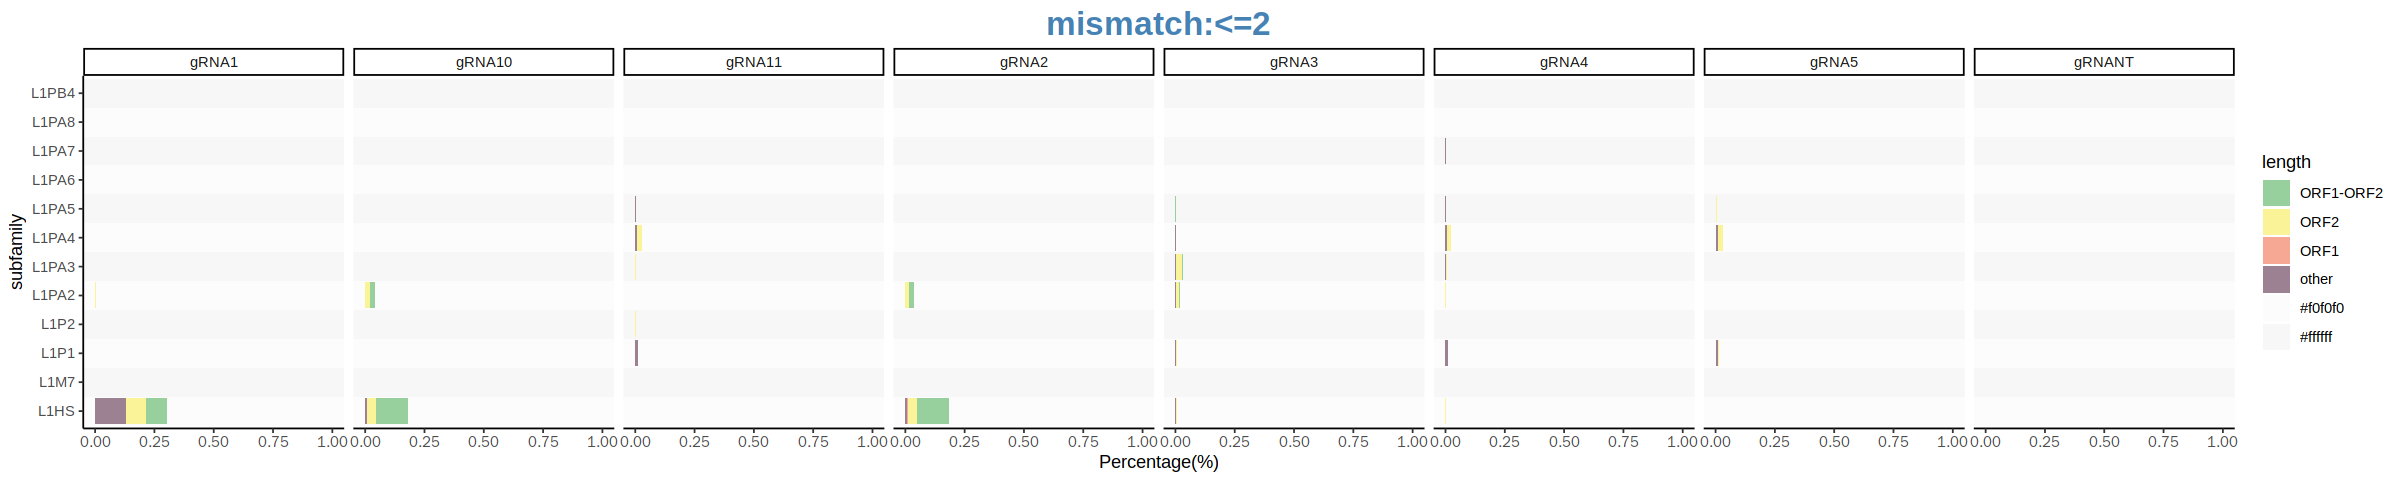

In [82]:
p